# MariaDB연결

In [22]:
import mysql.connector  # mysql과 python을 연결해주는 라이브러리를 불러옴

# MariaDB 연결 설정 정보를 저장한 딕셔너리
config = {
    'user': 'root',  # 데이터베이스 사용자 이름
    'password': '2544',  # 데이터베이스 접속 비밀번호
    'host': 'localhost',  # 데이터베이스가 설치된 서버 주소 (여기서는 로컬 컴퓨터)
    'port': 3306,  # 데이터베이스가 사용하는 포트 번호 (기본값: 3306)
    'database': 'ParkingData',  # 접속할 데이터베이스 이름
    'charset': 'utf8mb4',  # 데이터베이스에서 사용하는 문자셋 (이모지 등 4바이트 문자 지원)
    'collation': 'utf8mb4_general_ci'  # 데이터 비교 규칙 (대소문자 구분 없음)
}

try:
    # 데이터베이스 연결 시도
    # `mysql.connector.connect` 함수는 `config` 딕셔너리에 정의된 정보를 사용해 MariaDB에 연결함
    connection = mysql.connector.connect(**config)  # `**config`는 딕셔너리를 언패킹하여 각 값을 매개변수로 전달
    print("MariaDB 연결 성공!")  # 연결이 성공하면 이 메시지를 출력

    # 커서 생성
    # `cursor()`는 데이터베이스와 통신할 때 SQL 명령을 실행하기 위해 사용하는 객체를 생성
    cursor = connection.cursor()

# 연결 과정에서 오류가 발생한 경우 처리
except mysql.connector.Error as err:  # 오류 발생 시, `err`에 오류 정보를 저장
    print(f"Error: {err}")  # 오류 메시지를 출력, 예를 들어 비밀번호가 틀렸다는 내용


MariaDB 연결 성공!


언패킹은 리스트(List), 튜플(Tuple), 딕셔너리(Dictionary)와 같은 **반복 가능한 객체(iterable)**의 요소를 개별 변수나 매개변수로 분리하여 전달하는 과정을 말합니다.

In [23]:
# 데이터베이스에서 현재 존재하는 테이블 목록을 확인
cursor.execute("SHOW TABLES;")  # SQL 명령어 "SHOW TABLES;"를 실행하여 데이터베이스의 모든 테이블 목록을 가져옴

# `fetchall()`을 사용하여 결과를 가져옴
tables = cursor.fetchall()  # `fetchall()`은 SQL 명령의 결과를 모두 가져오는 함수로, 여기서는 테이블 목록을 리스트로 반환함

# 결과 출력
print("사용 가능한 테이블:")  # 출력 메시지
for table in tables:  # `tables` 리스트에서 각 테이블을 반복
    print(table)  # 각 테이블 이름을 출력


사용 가능한 테이블:
('parkingspots',)


### 점(.)의 역할
- 객체와 메서드 연결
- 점(.)은 객체(예: cursor)에 속한 메서드(예: fetchall) 또는 속성을 호출할 때 사용됩니다.
점 왼쪽에 있는 것이 객체, 오른쪽에 있는 것이 메서드나 속성입니다.


In [24]:
cursor.execute("SELECT * FROM ParkingSpots LIMIT 10")
rows = cursor.fetchall()

# 데이터 출력
for row in rows:
    print(row)


(datetime.date(2024, 12, 2), datetime.timedelta(seconds=28800), 9, 1, 5, 6, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=29100), 8, 3, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=29400), 7, 11, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=29700), 7, None, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=30000), 6, 8, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=30300), 6, None, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=30600), 6, None, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=30900), 5, 9, None, None, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=31200), 2, 10, 2, 4, None, None)
(datetime.date(2024, 12, 2), datetime.timedelta(seconds=31500), 0, 7, 12, None, None, None)


In [25]:
# 테이블 구조 확인
cursor.execute("DESCRIBE parkingspots;")
    
# 결과 가져오기
data = cursor.fetchall()

# 결과 출력
for column in data:
    print(column)  # column은 각 컬럼에 대한 정보가 들어있는 튜플


('Day', 'date', 'NO', '', None, '')
('Time', 'time', 'NO', '', None, '')
('Remaining', 'int(2)', 'YES', '', None, '')
('Parking_Spot1', 'int(2)', 'YES', '', None, '')
('Parking_Spot2', 'int(2)', 'YES', '', None, '')
('Parking_Spot3', 'int(2)', 'YES', '', None, '')
('Parking_Spot4', 'int(2)', 'YES', '', None, '')
('Parking_Spot5', 'int(2)', 'YES', '', None, '')


# 데이터 분석
- 1. 요일별로 차가 다 차는 평균 시간은 언제인지?

In [26]:
import pandas as pd  # pandas 라이브러리를 불러옴 (데이터 처리와 분석에 사용)

# 데이터 조회: SQL 명령 실행
cursor.execute("SELECT Day, Time, Remaining FROM parkingspots")  
# parkingspots 테이블에서 'Day', 'Time', 'Remaining' 컬럼의 데이터를 선택

# SQL 실행 결과를 모두 가져옴
data = cursor.fetchall()  
# fetchall()은 SQL 실행 결과를 튜플들의 리스트로 반환

# DataFrame으로 변환
df = pd.DataFrame(data, columns=["Day", "Time", "Remaining"])  
# pandas의 DataFrame 형식으로 변환, 컬럼 이름을 "Day", "Time", "Remaining"으로 설정

# 'Day' 컬럼을 datetime 형식으로 변환
df['Day'] = pd.to_datetime(df['Day'])  
# SQL에서 가져온 'Day' 컬럼 데이터를 pandas의 datetime 형식으로 변환하여 날짜와 시간 정보를 처리 가능하게 함

# 'Day' 컬럼에서 요일 이름 추출
df['Weekday'] = df['Day'].dt.strftime('%a')  
# dt.strftime('%a')는 날짜(datetime)에서 요일 정보를 추출하여 'Mon', 'Tue', 'Wed' 형식으로 저장

# 요일을 한글 형식으로 매핑
weekday_map = {  
    'Mon': '월', 'Tue': '화', 'Wed': '수', 'Thu': '목', 'Fri': '금'  # 영어 요일을 한글로 변환하기 위한 매핑 딕셔너리
}
df['Weekday'] = df['Weekday'].map(weekday_map)  
# 'Weekday' 컬럼 값을 위에서 정의한 딕셔너리를 이용해 한글 요일로 변환

# 결과 확인: 변환된 DataFrame 출력
print(df)  
# DataFrame의 현재 상태를 출력하여 확인


           Day            Time  Remaining Weekday
0   2024-12-02 0 days 08:00:00          9       월
1   2024-12-02 0 days 08:05:00          8       월
2   2024-12-02 0 days 08:10:00          7       월
3   2024-12-02 0 days 08:15:00          7       월
4   2024-12-02 0 days 08:20:00          6       월
..         ...             ...        ...     ...
125 2024-12-13 0 days 08:40:00          4       금
126 2024-12-13 0 days 08:45:00          3       금
127 2024-12-13 0 days 08:50:00          2       금
128 2024-12-13 0 days 08:55:00          2       금
129 2024-12-13 0 days 09:00:00          2       금

[130 rows x 4 columns]


In [27]:
df.dtypes

Day           datetime64[ns]
Time         timedelta64[ns]
Remaining              int64
Weekday               object
dtype: object

In [28]:
# 요일별 데이터 필터링
monday_data = df[df['Weekday'] == '월']
tuesday_data = df[df['Weekday'] == '화']
wednesday_data = df[df['Weekday'] == '수']
thursday_data = df[df['Weekday'] == '목']
friday_data = df[df['Weekday'] == '금']

In [29]:
import datetime  # 날짜 및 시간 처리를 위한 표준 라이브러리

# 초를 시간 형식으로 변환하는 함수
def seconds_to_time(seconds):
    """
    초 단위의 값을 시:분:초 형식으로 변환합니다.
    """
    h = seconds // 3600  # 시 계산
    m = (seconds % 3600) // 60  # 분 계산
    s = seconds % 60  # 초 계산
    return datetime.time(h, m, s)  # 시:분:초 형식의 time 객체 반환

# 요일별로 평균 시간을 계산하는 함수
def calculate_average_time(data, weekday):
    """
    특정 요일의 Remaining 값이 0이 되는 첫 번째 시간을 찾아
    평균 시간을 계산합니다.
    """
    # 특정 요일 데이터 필터링
    weekday_data = data[data['Weekday'] == weekday]  
    # Remaining 값이 0이 되는 최초 시간을 그룹별로 추출
    first_zero_times = weekday_data[weekday_data['Remaining'] == 0].groupby('Day')['Time'].first()

    # Remaining 값이 0인 데이터가 없을 경우 기본값(09:00:00) 반환
    if first_zero_times.empty:
        return datetime.time(9, 0, 0)

    # 'Time'을 timedelta로 변환 후 초 단위로 변환
    time_in_seconds = first_zero_times.dt.total_seconds()
    # 초 단위 평균 계산
    average_seconds = int(time_in_seconds.mean())
    # 초를 다시 시간 형식으로 변환하여 반환
    return seconds_to_time(average_seconds)

# 요일별 평균 계산 결과를 저장할 딕셔너리
average_times = {}

# 월~금 각 요일에 대해 평균 시간을 계산하여 저장
for weekday in ['월', '화', '수', '목', '금']:
    average_time = calculate_average_time(df, weekday)  # 특정 요일의 평균 시간 계산
    average_times[weekday] = average_time  # 계산된 값을 딕셔너리에 저장

# 결과 출력
for weekday, avg_time in average_times.items():
    # 각 요일별 평균적으로 주차장이 다 차는 시간을 출력
    print(f"{weekday}요일 평균적으로 주차장이 다 차는 시간: {avg_time}")


월요일 평균적으로 주차장이 다 차는 시간: 08:45:00
화요일 평균적으로 주차장이 다 차는 시간: 08:35:00
수요일 평균적으로 주차장이 다 차는 시간: 08:40:00
목요일 평균적으로 주차장이 다 차는 시간: 08:45:00
금요일 평균적으로 주차장이 다 차는 시간: 09:00:00


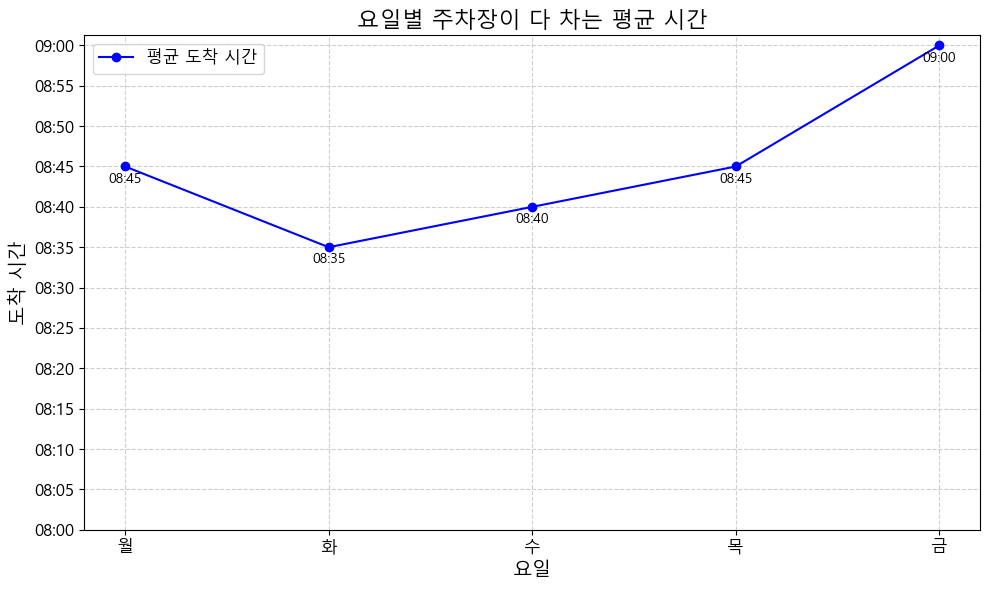

In [30]:
import matplotlib.pyplot as plt
import datetime
from matplotlib import rc

# 한글 폰트 설정 (Windows에서는 Malgun Gothic 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 요일별 평균 시간을 초 단위로 변환
weekday_seconds = {weekday: avg_time.hour * 3600 + avg_time.minute * 60 + avg_time.second for weekday, avg_time in average_times.items()}

# 요일별로 정렬
weekdays = ['월', '화', '수', '목', '금']
average_seconds = [weekday_seconds[day] for day in weekdays]

# 초를 시간으로 변환하여 Y축에 사용할 값 생성
y_labels_seconds = [8 * 3600 + 5 * 60 * i for i in range(13)]  # 8:00 ~ 9:00, 5분 간격
y_labels = [datetime.time(seconds // 3600, (seconds % 3600) // 60) for seconds in y_labels_seconds]

# 시각화를 위한 선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(weekdays, average_seconds, marker='o', color='blue', label="평균 도착 시간")

for i, avg_sec in enumerate(average_seconds):
    time_label = datetime.time(avg_sec // 3600, (avg_sec % 3600) // 60).strftime("%H:%M")
    plt.text(weekdays[i], avg_sec - 120, time_label, fontsize=10, color='black', ha='center')

# Y축을 시간 형식으로 변환
plt.yticks(y_labels_seconds, [time.strftime("%H:%M") for time in y_labels], fontsize=12)
plt.xticks(fontsize=12)
plt.title("요일별 주차장이 다 차는 평균 시간", fontsize=16)
plt.xlabel("요일", fontsize=14)
plt.ylabel("도착 시간", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


- 데이터를 확인해봤을 때 주차장이 월~목요일까지는 45분 전에는 다 차는데 금요일날은 9시가 되도 안차는 걸 확인할 수 있었다
- 여기서 Remaining이 0이 안될 때는 기본으로 9시에 다 찬다고 계산해서 평균적으로 차는 시간이 9시가 나옴
- 평균 8시 45분에 자리가 다 잠

  2. 어느 자리가 가장 빨리 주차 공간이 없어지는지?

In [31]:
cursor.execute("SELECT Time, Parking_Spot1,Parking_Spot2,Parking_Spot3,Parking_Spot4,Parking_Spot5 FROM parkingspots")
data = cursor.fetchall()

# DataFrame으로 변환
df = pd.DataFrame(data, columns=["Time", "Parking_Spot1","Parking_Spot2","Parking_Spot3","Parking_Spot4","Parking_Spot5"])

In [32]:
df

,Time,Parking_Spot1,Parking_Spot2,Parking_Spot3,Parking_Spot4,Parking_Spot5
0,0 days 08:00:00,1.0,5.0,6.0,NaN,NaN
1,0 days 08:05:00,3.0,NaN,NaN,NaN,NaN
2,0 days 08:10:00,11.0,NaN,NaN,NaN,NaN
3,0 days 08:15:00,NaN,NaN,NaN,NaN,NaN
4,0 days 08:20:00,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
125,0 days 08:40:00,7.0,NaN,NaN,NaN,NaN
126,0 days 08:45:00,8.0,NaN,NaN,NaN,NaN
127,0 days 08:50:00,9.0,NaN,NaN,NaN,NaN
128,0 days 08:55:00,NaN,NaN,NaN,NaN,NaN


In [37]:
# Parking_Spot1 ~ Parking_Spot5 열의 NaN 값을 빈 문자열로 채우고, float을 int로 변환 후 str로 변환
df[["Parking_Spot1", "Parking_Spot2", "Parking_Spot3", "Parking_Spot4", "Parking_Spot5"]] = (
    df[["Parking_Spot1", "Parking_Spot2", "Parking_Spot3", "Parking_Spot4", "Parking_Spot5"]]
    .fillna('')  # NaN 값을 빈 문자열로 채움
    .applymap(lambda x: str(int(float(x))) if x != '' else '')  # 값이 존재하면 float -> int -> str 변환
)

# 결과 확인
print(df.dtypes)  # 데이터 타입 확인
print(df)  # 변환된 데이터프레임 확인


Time             timedelta64[ns]
Parking_Spot1             object
Parking_Spot2             object
Parking_Spot3             object
Parking_Spot4             object
Parking_Spot5             object
dtype: object
               Time Parking_Spot1 Parking_Spot2 Parking_Spot3 Parking_Spot4  \
0   0 days 08:00:00             1             5             6                 
1   0 days 08:05:00             3                                             
2   0 days 08:10:00            11                                             
3   0 days 08:15:00                                                           
4   0 days 08:20:00             8                                             
..              ...           ...           ...           ...           ...   
125 0 days 08:40:00             7                                             
126 0 days 08:45:00             8                                             
127 0 days 08:50:00             9                                            

C:\Users\gkdms\AppData\Local\Temp\ipykernel_3940\593408212.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: str(int(float(x))) if x != '' else '')  # 값이 존재하면 float -> int -> str 변환


In [38]:
df.head()

,Time,Parking_Spot1,Parking_Spot2,Parking_Spot3,Parking_Spot4,Parking_Spot5
0,0 days 08:00:00,1,5,6,,
1,0 days 08:05:00,3,,,,
2,0 days 08:10:00,11,,,,
3,0 days 08:15:00,,,,,
4,0 days 08:20:00,8,,,,


In [45]:
# 자리별 점수 합산 함수
def calculate_total_parking_scores(df):
    # 자리별 총 점수를 기록할 딕셔너리
    spot_scores = {spot: 0 for spot in range(1, 13)}  # 1번부터 12번 자리 초기화

    # 데이터프레임의 각 행을 순회
    for _, row in df.iterrows():
        # 현재 시간의 점수 계산
        seconds = row['Time'].seconds  # Timedelta에서 총 초 계산
        hour = seconds // 3600  # 시 추출
        minute = (seconds % 3600) // 60  # 분 추출
        time_score = (hour - 8) * 12 + (minute // 5) + 1  # 시간 점수 계산

        # 각 Parking_Spot 열을 순회
        for column in df.columns[1:]:  # Parking_Spot1 ~ Parking_SpotN
            if row[column] != '':  # 빈 값이 아닌 경우만 처리
                spot = int(row[column])  # 자리 번호 (str -> int 변환)
                spot_scores[spot] += time_score  # 해당 자리의 점수 합산

    # 비어 있는 자리(시간이 없는 자리)는 기본 점수(9시 = 13)를 한 번 추가
    for spot in range(1, 13):
        if spot_scores[spot] == 0:  # 점수가 없는 자리만 처리
            spot_scores[spot] = 13  # 9시 점수

    # 점수를 기준으로 정렬
    sorted_spots = sorted(spot_scores.items(), key=lambda x: x[1])

    return sorted_spots

# 자리별 총 점수 계산
sorted_spots_with_total_scores = calculate_total_parking_scores(df)

# 결과 출력
print("자리별 주차 순위 (총 점수 기준):")
for rank, (spot, score) in enumerate(sorted_spots_with_total_scores, start=1):
    print(f"{rank}위: {spot}번 자리, 총 점수: {score}")


자리별 주차 순위 (총 점수 기준):
1위: 6번 자리, 총 점수: 10
2위: 3번 자리, 총 점수: 14
3위: 1번 자리, 총 점수: 16
4위: 11번 자리, 총 점수: 33
5위: 2번 자리, 총 점수: 39
6위: 4번 자리, 총 점수: 43
7위: 10번 자리, 총 점수: 46
8위: 5번 자리, 총 점수: 50
9위: 8번 자리, 총 점수: 52
10위: 7번 자리, 총 점수: 69
11위: 12번 자리, 총 점수: 69
12위: 9번 자리, 총 점수: 81


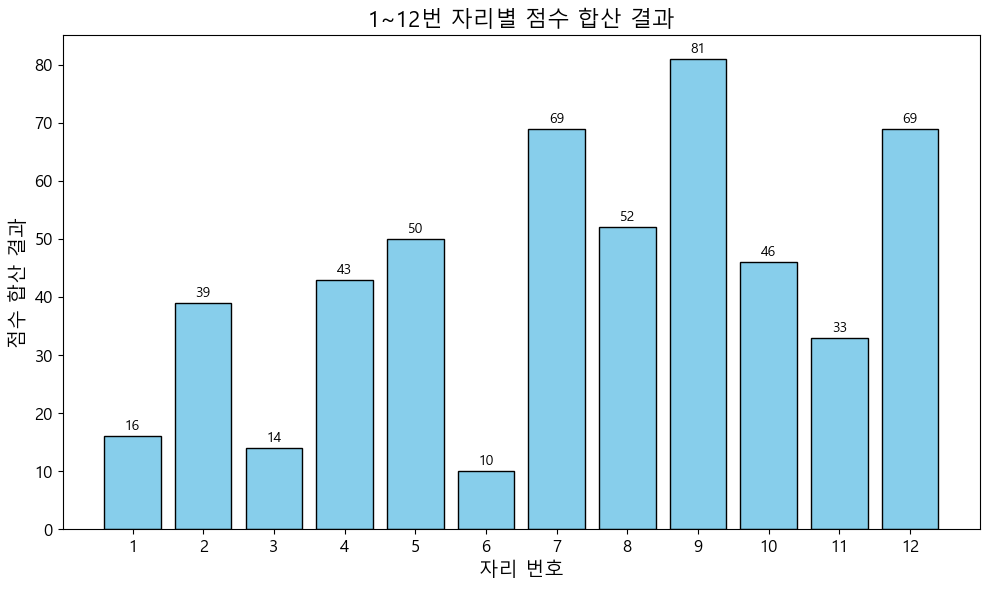

In [50]:
# 자리 번호와 점수 추출
spots = [spot for spot, _ in sorted_spots_with_total_scores]
scores = [score for _, score in sorted_spots_with_total_scores]

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(spots, scores, color='skyblue', edgecolor='black')

# 각 막대 위에 데이터 레이블 추가
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(score),
             ha='center', va='bottom', fontsize=10)

# 그래프 제목 및 축 레이블 설정
plt.title("1~12번 자리별 점수 합산 결과", fontsize=16)
plt.xlabel("자리 번호", fontsize=14)
plt.ylabel("점수 합산 결과", fontsize=14)

# 축 값 설정
plt.xticks(spots, fontsize=12)
plt.yticks(fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

  3. 1~12번 자리의 평균 자리가 차는 시간을 각각 구해보자

In [47]:
import datetime

# 자리별 평균 시간을 계산하는 함수
def calculate_average_parking_times(df):
    # 자리별 평균 시간을 기록할 딕셔너리
    spot_times = {spot: [] for spot in range(1, 13)}  # 1번부터 12번 자리 초기화

    # 데이터프레임의 각 행을 순회
    for _, row in df.iterrows():
        # 각 Parking_Spot 열을 순회
        for column in df.columns[1:]:  # Parking_Spot1 ~ Parking_SpotN
            if row[column] != '':  # 빈 값이 아닌 경우만 처리
                spot = int(row[column])  # 자리 번호 (str -> int 변환)
                # Timedelta에서 시간을 초 단위로 변환
                seconds = row['Time'].total_seconds()
                spot_times[spot].append(seconds)

    # 평균 시간 계산
    average_times = {}
    for spot, times in spot_times.items():
        if times:  # 시간이 존재하는 경우만 평균 계산
            avg_seconds = sum(times) // len(times)  # 초 단위 평균 계산
            avg_time = datetime.time(int(avg_seconds // 3600), int((avg_seconds % 3600) // 60), int(avg_seconds % 60))  # 초를 시간으로 변환
            average_times[spot] = avg_time
        else:  # 주차 기록이 없는 경우 기본값 설정 (09:00:00)
            average_times[spot] = datetime.time(9, 0, 0)

    return average_times

# 자리별 평균 시간 계산
average_parking_times = calculate_average_parking_times(df)

# 결과 출력
print("자리별 평균 주차 시간:")
for spot, avg_time in sorted(average_parking_times.items()):
    print(f"{spot}번 자리: 평균 주차 시간 {avg_time}")


자리별 평균 주차 시간:
1번 자리: 평균 주차 시간 08:03:00
2번 자리: 평균 주차 시간 08:19:22
3번 자리: 평균 주차 시간 08:02:00
4번 자리: 평균 주차 시간 08:14:32
5번 자리: 평균 주차 시간 08:30:42
6번 자리: 평균 주차 시간 08:00:00
7번 자리: 평균 주차 시간 08:38:07
8번 자리: 평균 주차 시간 08:32:08
9번 자리: 평균 주차 시간 08:35:30
10번 자리: 평균 주차 시간 08:27:51
11번 자리: 평균 주차 시간 08:11:30
12번 자리: 평균 주차 시간 08:26:21


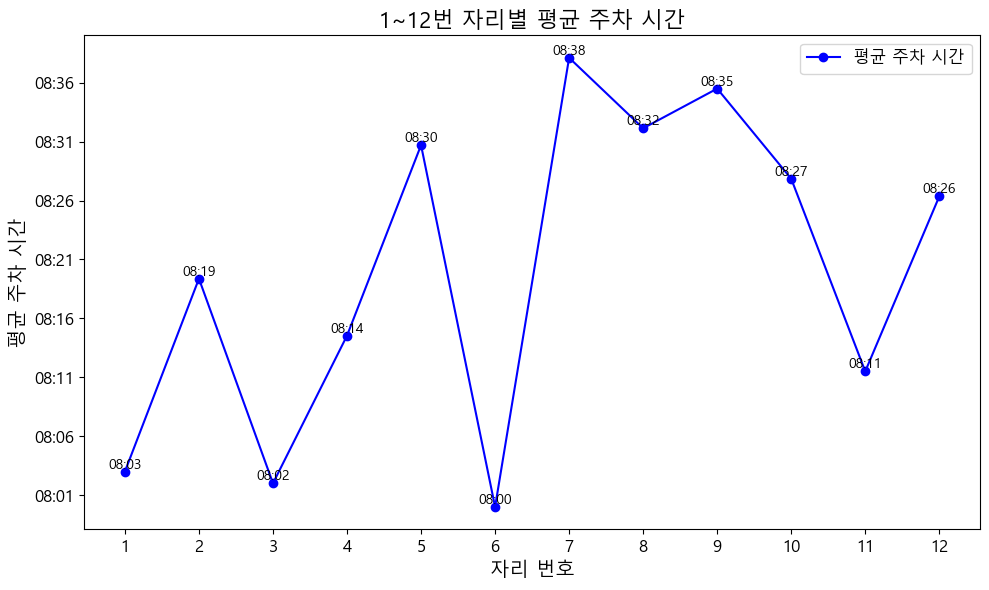

In [58]:
from datetime import datetime, time, date  # date를 명시적으로 임포트
# X축 (자리 번호)
spots = list(average_parking_times.keys())

# Y축 (평균 주차 시간 - datetime 변환)
times = [datetime.combine(date.today(), t) for t in average_parking_times.values()]

# 선 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(spots, times, marker="o", color="blue", label="평균 주차 시간")

# 각 점 위에 평균 시간을 레이블로 표시
for spot, avg_time in zip(spots, average_parking_times.values()):
    plt.text(spot, datetime.combine(date.today(), avg_time), avg_time.strftime("%H:%M"),
             ha='center', va='bottom', fontsize=10)

# Y축을 시간 형식으로 설정
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.gca().yaxis.set_major_locator(mdates.MinuteLocator(interval=5))

# 그래프 제목 및 축 레이블 설정
plt.title("1~12번 자리별 평균 주차 시간", fontsize=16)
plt.xlabel("자리 번호", fontsize=14)
plt.ylabel("평균 주차 시간", fontsize=14)

# 축 값 설정
plt.xticks(spots, fontsize=12)
plt.yticks(fontsize=12)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()